In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 30.4 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [3]:
name = 'chess.dat'
#name = 'mushroom.dat'

dataset = '/content/drive/My Drive/Colab Notebooks/Apriori/' + name

data = pd.read_csv(dataset, sep=' ', header=None)
data.fillna(0,inplace=True)
data=data.astype(int)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,0
1,1,3,5,7,9,12,13,15,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,0
2,1,3,5,7,9,12,13,16,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,0
3,1,3,5,7,9,11,13,15,17,20,21,23,25,27,29,31,34,36,38,40,42,44,47,48,50,52,54,56,58,60,62,64,66,68,70,72,74,0
4,1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,34,36,38,40,42,44,46,48,51,52,54,56,58,60,62,64,66,68,70,72,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,2,4,5,7,9,11,13,16,17,19,21,23,26,27,29,33,34,36,38,40,42,44,46,49,51,52,54,56,58,61,62,64,67,68,70,73,74,0
3192,2,4,5,7,9,11,13,16,17,19,21,23,26,27,29,33,34,36,38,40,42,44,46,49,50,52,54,56,58,61,62,64,67,68,70,73,74,0
3193,2,4,5,7,9,11,13,16,17,19,21,23,26,27,29,31,34,36,38,40,42,44,46,49,50,52,54,56,58,61,62,64,67,68,70,73,74,0
3194,2,4,5,8,9,11,13,16,17,19,21,23,26,27,30,33,35,36,38,40,42,44,46,48,51,52,54,56,58,61,62,64,67,68,71,73,74,0


In [4]:
row = len(data)
col = len(data.values[0])
#print(row, col)

In [5]:
records_List = []
for i in range(0, row):
    records_List.append([
                        int(data.values[i,j])
                        for j in range(0, col)
                            if (int(data.values[i,j]) != 0)
                       ])
#records_List

In [6]:
te = TransactionEncoder()
te_ary = te.fit(records_List).transform(records_List)
dataX = pd.DataFrame(te_ary, columns=te.columns_)
dataX = dataX.astype(int)
#dataX

In [7]:
fpgrowth(dataX, min_support=1)

,support,itemsets


In [11]:
threshold = 1
total_Time = []
threshold_value = []

for i in range(0,7):
  begin = time.time()
  result = fpgrowth(dataX, min_support=threshold)
  end = time.time()
  total_Time.append(end-begin)
  threshold_value.append(threshold)
  threshold -= 0.1
  print(begin,end)
total_Time
#threshold_value

1631915108.7610543 1631915108.8003657
1631915108.8005297 1631915108.8720653
1631915108.8722918 1631915109.1684616
1631915109.1686237 1631915110.2519135
1631915110.252082 1631915115.123414
1631915115.1242356 1631915135.551995
1631915135.5529945 1631915231.5991435


[0.03931140899658203,
 0.07153558731079102,
 0.2961697578430176,
 1.0832898616790771,
 4.8713319301605225,
 20.427759408950806,
 96.04614901542664]

In [12]:
print(total_Time)
print(threshold_value)

[0.03931140899658203, 0.07153558731079102, 0.2961697578430176, 1.0832898616790771, 4.8713319301605225, 20.427759408950806, 96.04614901542664]
[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013]


-->**Mushroom**

[0.25842881202697754, 0.10440802574157715, 0.1211397647857666, 0.10687017440795898, 0.12969374656677246, 0.1438894271850586, 0.1778252124786377, 0.23185992240905762, 0.5937631130218506, 4.875962972640991]

[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016, 0.20000000000000015, 0.10000000000000014]

-->**Chess**

[0.03931140899658203, 0.07153558731079102, 0.2961697578430176, 1.0832898616790771, 4.8713319301605225, 20.427759408950806, 96.04614901542664]

[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013]

<function matplotlib.pyplot.show>

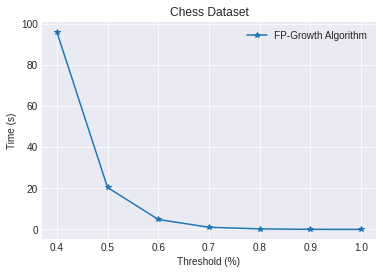

In [16]:
plt.style.use('seaborn-darkgrid')

plt.plot(threshold_value, total_Time, '-*')
plt.title('Chess Dataset')
plt.xlabel('Threshold (%)')
plt.ylabel('Time (s)')
plt.legend(['FP-Growth Algorithm'], loc='upper right')
#plt.savefig('/content/drive/My Drive/Colab Notebooks/Apriori/Chess_apriori.pdf', dpi=300, bbox_inches='tight')
plt.show